# [ICTCOG AI Academy] 7기 고급시각저녁반
# CNN (1) - Basic


#### 1. Raw data : information loss (x)
- 가공되지 않은 원본 데이터
- 문제점: 이미지 특성을 2, 3차원을 1차원을 바꾸면 정보 손실되며 특성 유지 못함
  - 차원의 저주 발생: 모델의 복잡성에 비해서 데이터가 충분하지 않음

#### 2. Featured data
- Reduction
- information loss


### 이미지 처리
  - Global : 전체 조작
  - Local :일부 조작

 > 머신러닝 PCA(주성분분석)
   - 차원 축소하면서 중요 특성 유지



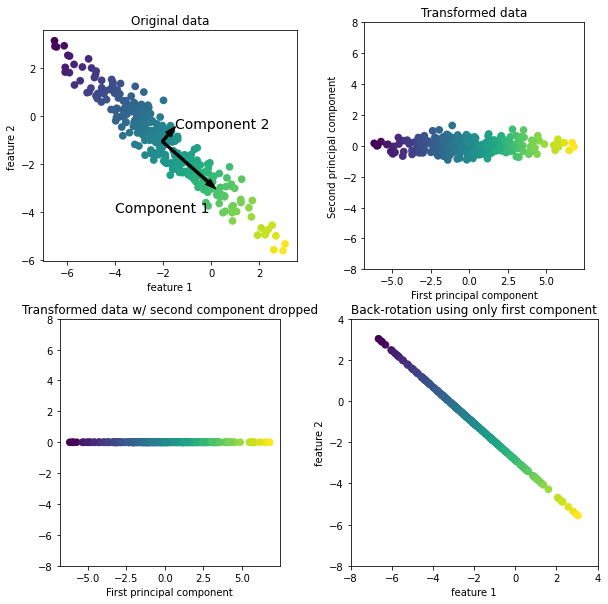

In [85]:
import mglearn
mglearn.plot_pca.plot_pca_illustration()  #차원 축소 

In [1]:
from skimage.util import view_as_blocks, view_as_windows

In [13]:
from skimage.data import coffee,camera

In [3]:
import matplotlib.pyplot as plt

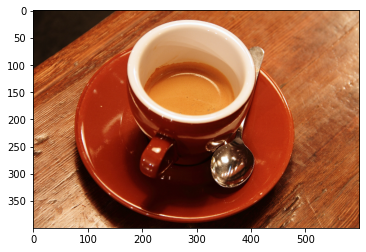

In [7]:
data= coffee()
plt.imshow(data)

In [9]:
data.shape  

(400, 600, 3)

In [12]:
view_as_blocks(data, (20,30,1))  #3차원에 맞추어

array([[[[[[ 21],
           [ 21],
           [ 20],
           ...,
           [ 32],
           [ 31],
           [ 32]],

          [[ 21],
           [ 21],
           [ 20],
           ...,
           [ 33],
           [ 31],
           [ 32]],

          [[ 21],
           [ 23],
           [ 20],
           ...,
           [ 33],
           [ 32],
           [ 32]],

          ...,

          [[ 23],
           [ 22],
           [ 22],
           ...,
           [ 34],
           [ 32],
           [ 34]],

          [[ 22],
           [ 22],
           [ 22],
           ...,
           [ 33],
           [ 33],
           [ 32]],

          [[ 21],
           [ 23],
           [ 23],
           ...,
           [ 33],
           [ 30],
           [ 30]]],


         [[[ 13],
           [ 13],
           [ 11],
           ...,
           [ 20],
           [ 19],
           [ 20]],

          [[ 13],
           [ 13],
           [ 14],
           ...,
           [ 21],
           [

overlapping 여부에 따른 이미지 변화 

In [14]:
data1= camera()

In [35]:
vb=view_as_blocks(data1, (4,4))
vb

array([[[[156, 157, 160, 159],
         [156, 157, 159, 158],
         [158, 157, 156, 156],
         [160, 157, 154, 154]],

        [[158, 156, 155, 156],
         [158, 156, 155, 156],
         [157, 157, 157, 157],
         [156, 157, 158, 157]],

        [[158, 157, 156, 157],
         [158, 157, 156, 157],
         [157, 158, 158, 158],
         [157, 158, 160, 159]],

        ...,

        [[156, 155, 154, 153],
         [156, 155, 154, 153],
         [156, 155, 154, 154],
         [156, 155, 155, 155]],

        [[153, 151, 151, 150],
         [153, 151, 151, 150],
         [154, 153, 153, 152],
         [155, 154, 154, 154]],

        [[151, 152, 152, 152],
         [151, 152, 152, 152],
         [153, 152, 152, 152],
         [155, 153, 152, 152]]],


       [[[158, 157, 156, 156],
         [156, 157, 159, 159],
         [158, 157, 156, 156],
         [160, 157, 154, 154]],

        [[157, 156, 155, 155],
         [159, 156, 154, 155],
         [157, 156, 155, 155],
         

In [36]:
 vw=view_as_windows(data1, (4,4)) #reduction
 vw

array([[[[156, 157, 160, 159],
         [156, 157, 159, 158],
         [158, 157, 156, 156],
         [160, 157, 154, 154]],

        [[157, 160, 159, 158],
         [157, 159, 158, 158],
         [157, 156, 156, 157],
         [157, 154, 154, 156]],

        [[160, 159, 158, 156],
         [159, 158, 158, 156],
         [156, 156, 157, 157],
         [154, 154, 156, 157]],

        ...,

        [[151, 150, 151, 152],
         [151, 150, 151, 152],
         [153, 152, 153, 152],
         [154, 154, 155, 153]],

        [[150, 151, 152, 152],
         [150, 151, 152, 152],
         [152, 153, 152, 152],
         [154, 155, 153, 152]],

        [[151, 152, 152, 152],
         [151, 152, 152, 152],
         [153, 152, 152, 152],
         [155, 153, 152, 152]]],


       [[[156, 157, 159, 158],
         [158, 157, 156, 156],
         [160, 157, 154, 154],
         [158, 157, 156, 156]],

        [[157, 159, 158, 158],
         [157, 156, 156, 157],
         [157, 154, 154, 156],
         

In [37]:
vb.shape , vw.shape

((128, 128, 4, 4), (509, 509, 4, 4))

- 특성 유지하며 크기 줄임
- overlap 안 하는 경우 인접한 경계선의 값들은 무시됨
- ovelapping 된 경우 특성 유지  
### reduction 
- 대표하는 값으로 요약
- 픽셀 고유의 특징과 고유의 2차원 특성이 사라지게 됨
- 이미지 특성에 따라!!! 
    - max : 밝은 값 강조
    - average/mean
    - min : 어두운 값 강조


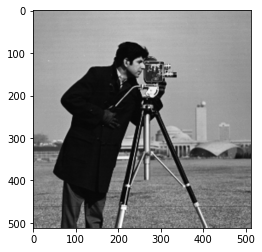

In [51]:
plt.imshow(data1, cmap='gray')   #원본과 비교

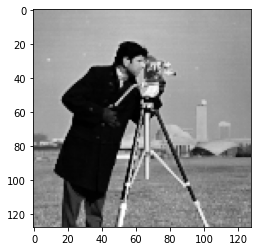

In [42]:
plt.imshow (np.max(vb.reshape(vb.shape[0], vb.shape[1],-1),axis=2), cmap='gray')  #overlap

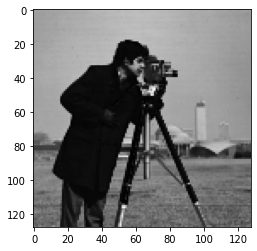

In [45]:
plt.imshow (np.min(vb.reshape(vb.shape[0], vb.shape[1],-1),axis=2), cmap='gray')  

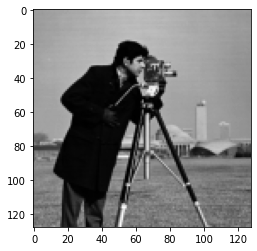

In [48]:
plt.imshow (np.mean(vb.reshape(vb.shape[0], vb.shape[1],-1),axis=2), cmap='gray')  

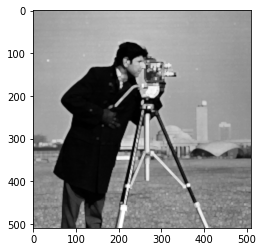

In [41]:
plt.imshow (np.max(vw.reshape(vw.shape[0], vw.shape[1],-1),axis=2), cmap='gray')  #겹침

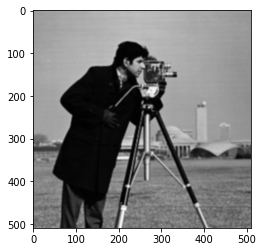

In [49]:
plt.imshow (np.mean(vw.reshape(vw.shape[0], vw.shape[1],-1),axis=2), cmap='gray')  #겹침

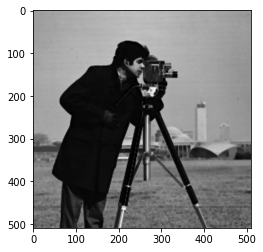

In [47]:
plt.imshow (np.min(vw.reshape(vw.shape[0], vw.shape[1],-1),axis=2), cmap='gray')  # 

In [26]:
view_as_windows(data1, (4,4)).shape

(509, 509, 4, 4)

 ### Image Feature Extraction
- 목적:  원본 이미지로부터 windowing으로 축소하면서 가능한 성능  유지
  - 방법: convolution 연산

## 연산 방법
- **필터를 통해서 새로운 이미지로 변환해서 feature 추출**해서 성능향상

### Correlation 연산
- 벡터간의 연산 방식에 따라 결과물이 다름
- mode : {'valid', 'same', 'full'}
  - 기본 valid

In [54]:
#벡터간의 길이가 동일한 경우
a=np.array([3,4,1])
b=np.array([1,3,0])

np.correlate( a,b) #2개의 벡터 상관관계 계산

array([15])

In [56]:
a@b

15

In [77]:
#벡터간의 길이가 상이한 경우
x=np.array([3,4,1,4,2,3])
y=np.array([1,3,0])

np.correlate(x,y) #슬라이딩

array([15,  7, 13, 10])

In [60]:
np.array([3,4,1])@np.array([1,3,0]) ,  np.array([4,1,4])@np.array([1,3,0]),  np.array([1,4,2])@np.array([1,3,0]) ,np.array([4,2,3])@np.array([1,3,0])

(15, 7, 13, 10)

In [64]:
np.correlate(x,y,'same')   #길이 6

array([11, 10, 13,  7, 15,  9])

zero- padding으로 맞춤(0으로 채줘줌)

In [62]:
np.correlate(x,y,'full') # 길이 8  => zero- padding으로 맞춤(0으로 채줘줌)

array([ 0,  9, 15,  7, 13, 10, 11,  3])

In [63]:
import tensorflow as tf

In [ ]:
tf.keras.layers.Conv2D( padding='same') #컨볼루션 여산에도 padding 방식 있음

### Filter 
- 패치 연산을 통해서 새로운 연산 만듦

### Convolution 연산
- 좌우반전 후 correlation 연산
- mode : {'full', 'valid', 'same'}
  - 기본 full

  > 신호처리 
    - correlation 보다 범용적

> 실제 Convolution 연산에서 좌우반전을 안 함
  - correlation 연산으로도 충분
  - 그 이유는 나중에 다룰 예정



In [75]:
np.convolve(x,y, mode='full') #기본 full

array([ 3, 13, 13,  7, 14,  9,  9,  0])

In [82]:
#좌우 반전
y=np.array([1,3,0])
y_= y[::-1]
y_

array([0, 3, 1])

In [83]:
np.correlate(x,y_,'full')  #컨볼루션 연산 결과와 동일

array([ 3, 13, 13,  7, 14,  9,  9,  0])

- Correlate, convolve 
  - Numpy는 1차식만 지원
  - Scipy : Numpy 기반 과학 패키지 

In [86]:
import scipy

In [88]:
scipy.lookfor('convolve') #Scipy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.lookfor is deprecated and will be removed in SciPy 2.0.0, use numpy.lookfor instead
  """Entry point for launching an IPython kernel.


Search results for 'convolve'
-----------------------------
numpy.convolve
    Returns the discrete, linear convolution of two one-dimensional sequences.
numpy.polymul
    Find the product of two polynomials.
numpy.correlate
    Cross-correlation of two 1-dimensional sequences.
numpy.vectorize
    vectorize(pyfunc, otypes=None, doc=None, excluded=None, cache=False,
numpy.ma.convolve
    Returns the discrete, linear convolution of two one-dimensional sequences.
numpy.ma.correlate
    Cross-correlation of two 1-dimensional sequences.


In [89]:
scipy.lookfor('conv')

Search results for 'conv'
-------------------------
numpy.convolve
    Returns the discrete, linear convolution of two one-dimensional sequences.
numpy.poly1d
    A one-dimensional polynomial class.
numpy.asarray
    Convert the input to an array.
numpy.deg2rad
    Convert angles from degrees to radians.
numpy.degrees
    Convert angles from radians to degrees.
numpy.rad2deg
    Convert angles from radians to degrees.
numpy.radians
    Convert angles from degrees to radians.
numpy.asfarray
    Return an array converted to a float type.
numpy.asscalar
    Convert an array of size 1 to its scalar equivalent.
numpy.asanyarray
    Convert the input to an ndarray, but pass ndarray subclasses through.
numpy.atleast_1d
    Convert inputs to arrays with at least one dimension.
numpy.ma.convolve
    Returns the discrete, linear convolution of two one-dimensional sequences.
numpy.format_parser
    Class to convert formats, names, titles description to a dtype.
numpy.char.lower
    Return an arra

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.lookfor is deprecated and will be removed in SciPy 2.0.0, use numpy.lookfor instead
  """Entry point for launching an IPython kernel.


#### ndimage
skimage생성되고 나서 ndimage 자주 사용 안 됨

mode : reflect , constant, nearest 가, mirror ,wrap 

In [96]:
from scipy.ndimage import convolve, convolve1d, correlate, correlate1d

In [97]:
np.convolve is scipy.ndimage.convolve1d  #상이함

False

실제 convolution, correlation

In [ ]:
#신호처리
from scipy.signal import convolve, concolve2d, correlate, correlate2d

In [100]:
scipy.ndimage.convolve is scipy.signal.convolve  #상이함

False

### window sliding

- Filter 개념 정하는것에 따라서 전체 컨볼루션 연산

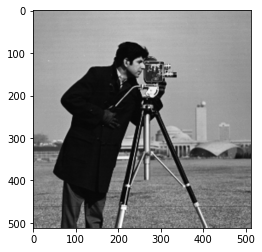

In [102]:
plt.imshow(data1,cmap='gray')

In [103]:
kernel = np.array([[1,2],[3,2]]) #2x2 커널

In [105]:
dir(data1)  #__iter__ -> for 

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

output 크기 맞추기



In [121]:
x= np.arange(1,16).reshape(3,5)  #3x5
x

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [120]:
for i in range(x.shape[0]):
  for j in range(x.shape[1]):
    print(x[i,j])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [116]:
for i in range(x.shape[1]):
  for j in range(x.shape[0]):
    print(x[j,i])

1
6
11
2
7
12
3
8
13
4
9
14
5
10
15


In [125]:
y=np.ones_like(x)
y

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [126]:
for i in range(x.shape[0]):
  for j in range(x.shape[1]):
    y[i,j]=x[i,j]

In [127]:
y  #각 값을 x의 값들로 채움

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

### 컨볼루션 연산하는 함수 만들기
-  결과를 위와 같이 for 이용해서 채워 넣을 예정

In [130]:
output = np.zeros((data1.shape[0]-1, data1.shape[1]-1))
output

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [131]:
output.shape

(511, 511)

In [132]:
x

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [139]:
test =np.array([[2,3,],[4,5]])

In [141]:
kernel, test 

(array([[1, 2],
        [3, 2]]), array([[2, 3],
        [4, 5]]))

In [146]:
np.sum(kernel * test)

30

In [147]:
np.einsum('ij,ij->',kernel, test)

30

In [144]:
convolve(kernel,test)

array([[26, 28],
       [36, 28]])

element-wise 연산
- 동일한 위치의 값 계산

In [150]:
#커널 크기 맞추기 위해 slicing
kernel *data1[0:2,0:2] 
kernel *data1[0:2,1:3] 

array([[156, 314],
       [468, 314]])

In [155]:
a= np.arange(25).reshape(5,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [156]:
#1번째 연산
kernel * a[0:2,0:2] 

array([[ 0,  2],
       [15, 12]])

In [158]:
np.sum(kernel * a[0:2,0:2]) #결과

29

In [157]:
#2번째 연산
kernel * a[0:2,1:3]

array([[ 1,  4],
       [18, 14]])

In [186]:
output = np.zeros((5,5))  #
output

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [170]:
for i in range(a.shape[0]):   #5행
  for j in range(a.shape[1]): #5열
    output[i,j] = np.sum( kernel * a[ i:i+ kernel.shape[0], j:j+ kernel.shape[1] ])

In [172]:
output[0:4,0:4] #valid

array([[ 29.,  37.,  45.,  53.],
       [ 69.,  77.,  85.,  93.],
       [109., 117., 125., 133.],
       [149., 157., 165., 173.]])

In [175]:
output= np.zeros((a.shape[0]-  kernel.shape[0]+1 ,  a.shape[1]-kernel.shape[1]+1))
for i in range(a.shape[0]-  kernel.shape[0]+1):   #4행
  for j in range(a.shape[1]-kernel.shape[1]+1):   #4열
    output[i,j] = np.sum( kernel * a[i:i+ kernel.shape[0], j:j+  kernel.shape[1] ])

In [176]:
output

array([[ 29.,  37.,  45.,  53.],
       [ 69.,  77.,  85.,  93.],
       [109., 117., 125., 133.],
       [149., 157., 165., 173.]])

- 일반화해서 커널 사이즈 상관 없이 사용 가능 하도록 작성 

In [178]:
kernel= np.array([[1,2,3],[2,3,4],[2,3,4]])  #3x3 커널로 변경

output= np.zeros((a.shape[0]-  kernel.shape[0]+1 ,  a.shape[1]-kernel.shape[1]+1))
for i in range(a.shape[0]-  kernel.shape[0]+1):   #3행
  for j in range(a.shape[1]-kernel.shape[1]+1):   #3열
    output[i,j] = np.sum( kernel * a[i:i+ kernel.shape[0], j:j+  kernel.shape[1] ])

output   #3x3

array([[165., 189., 213.],
       [285., 309., 333.],
       [405., 429., 453.]])

In [199]:
def convolve(data, kernel): 
  ''' 컨볼루션 함수'''
  kernel= np.fliplr(np.flipud(kernel))  #2차원은 상하좌우 반전 

  output= np.zeros((data.shape[0]-  kernel.shape[0]+1 ,  data.shape[1]-kernel.shape[1]+1))

  for i in range(data.shape[0]-  kernel.shape[0]+1):  
    for j in range(data.shape[1]-kernel.shape[1]+1): 
      output[i,j] = np.sum( kernel * data[i:i+ kernel.shape[0], j:j+  kernel.shape[1] ])

  return output  

In [197]:
 #상하 좌우반전 적용된 컨볼루션 결과
convolve(a,kernel) 

array([[123., 147., 171.],
       [243., 267., 291.],
       [363., 387., 411.]])

In [201]:
convolve(data1, np.arange(16).reshape(4,4)) #kernel 크기 4x4인 경우

array([[18907., 18937., 18918., ..., 18169., 18183., 18232.],
       [18853., 18834., 18815., ..., 18250., 18246., 18268.],
       [18809., 18743., 18734., ..., 18349., 18324., 18314.],
       ...,
       [14840., 15068., 14930., ..., 15858., 15364., 14699.],
       [14889., 15207., 15251., ..., 15859., 15318., 14583.],
       [14845., 15154., 15614., ..., 15678., 15133., 14431.]])

In [203]:
conv_i=convolve(data1/255, kernel)
conv_i

array([[14.79215686, 14.84705882, 14.88627451, ..., 14.22745098,
        14.28627451, 14.30588235],
       [14.80784314, 14.75294118, 14.7372549 , ..., 14.3254902 ,
        14.34901961, 14.31764706],
       [14.81568627, 14.68627451, 14.63921569, ..., 14.40392157,
        14.4       , 14.33333333],
       ...,
       [11.45882353, 11.92156863, 12.09019608, ..., 12.43921569,
        11.87058824, 11.        ],
       [11.50196078, 11.79215686, 12.00392157, ..., 12.26666667,
        11.69803922, 10.94509804],
       [11.54901961, 11.72941176, 11.95294118, ..., 12.18823529,
        11.61960784, 10.94117647]])

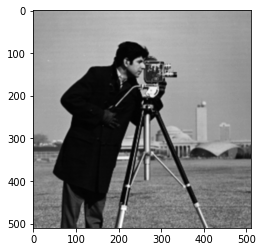

In [205]:
plt.imshow(conv_i,cmap='gray') 

원래 이미지에 필터를 슬라이딩하면서 곱해서 새로운 이미지가 나옴


In [206]:
#커널 변경 
kernel = np.array([[1,0,0],[0,0,0],[0,0,1]])

In [207]:
convolve(data1,kernel)

array([[312., 313., 317., ..., 302., 303., 304.],
       [310., 311., 315., ..., 303., 303., 304.],
       [314., 313., 313., ..., 305., 305., 304.],
       ...,
       [240., 250., 264., ..., 257., 251., 236.],
       [242., 249., 261., ..., 255., 247., 234.],
       [247., 249., 256., ..., 254., 243., 232.]])

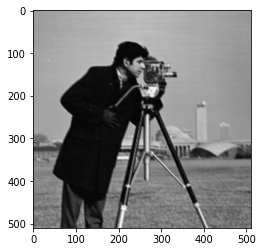

In [208]:
plt.imshow(convolve(data1,kernel), cmap='gray')

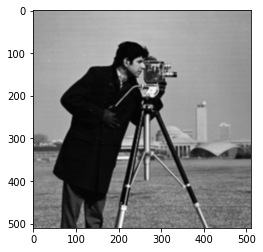

In [211]:
kernel = np.array([[1,0,1],[0,0,1],[1,0,1]])
plt.imshow(convolve(data1/255,kernel), cmap='gray')

##### edge detedction
- 가장자리만 강조하는 커널

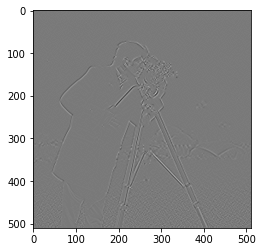

In [223]:
kernel = np.array([[1,0,-1],[0,0,0],[-1,0,1]])
plt.imshow(convolve(data1/255,kernel), cmap='gray')

##### 반전
- 이미지 반전 효과

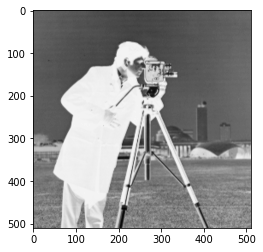

In [214]:
kernel = np.array([[-1,-1,-1],[-1,8,-11],[-1,-1,-1]])
plt.imshow(convolve(data1/255,kernel), cmap='gray')

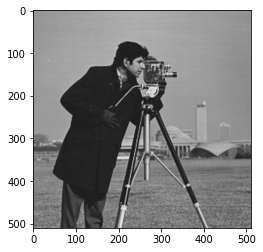

In [215]:
kernel = np.array([[0,-1,0],[-1,8,-1],[0,-1,0]])
plt.imshow(convolve(data1/255,kernel), cmap='gray')  #원본과 비슷하게 바꿈 

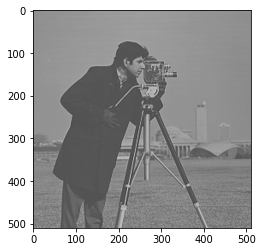

In [217]:
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
plt.imshow(convolve(data1/255,kernel), cmap='gray')  #원본과 비슷하게 바꿈 

#### 가우시안 블러 

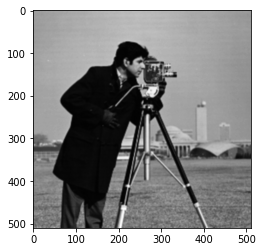

In [218]:
kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])/9
plt.imshow(convolve(data1/255,kernel), cmap='gray')  #원본과 비슷하게 바꿈 

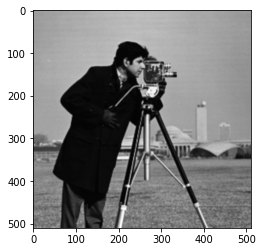

In [222]:
kernel = np.array([[1,2,1],[2,4,2],[1,2,1]])/25
plt.imshow(convolve(data1/255,kernel), cmap='gray')  #원본과 비슷하게 바꿈 

- 커널에 따라서 원본 이미지가 축소 되면서 새로운 이미지로  바뀌었음


### Feature Extraction
1. ***학습을 통해서 가장 머신러닝의 성능을 높일수 있는 커널을 찾음***
2. **여러 개의 커널 필터 사용**해서 여러가지의 특징을 추출
3. 레이어 개념을 컨볼루션에 도입
  - Activation function 개념
  - 복잡한 특징 찾을 수 있음
  - 3차원(기본) 데이터 입력 받음

- [CNN 시각화 참고 keras-js](https://transcranial.github.io/keras-js/#/mnist-cnn)
  - 숫자 4 이미지를 넣은 경우 하단과 같이 나옴
  - 숨겨진 특징이 반영된 최종으로 변화된 데이터를 1차원화하여 예측모델에 학습하니 성능 좋음
    - 컨볼루션에만 학습 불가
      - symmetric invariant




  

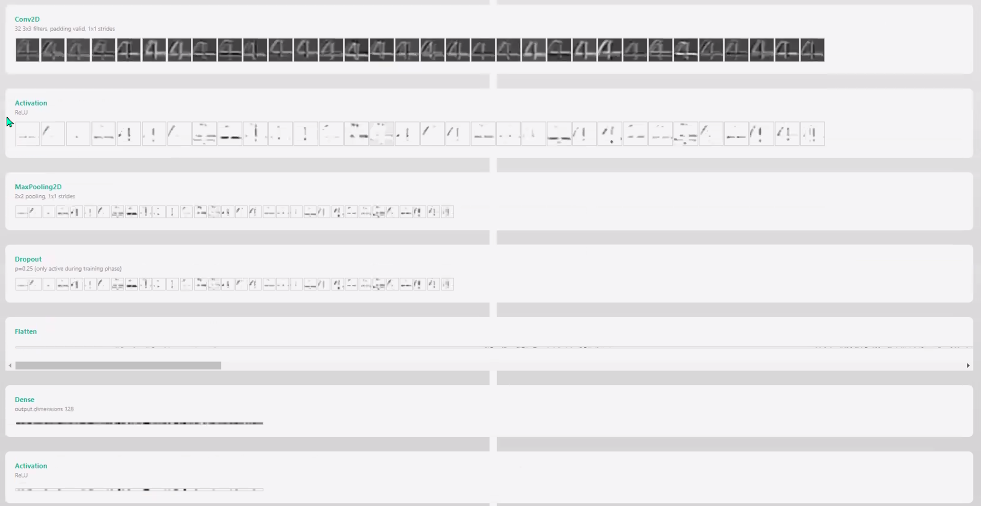